In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("Crop Production data.csv")
pd.set_option('display.max_columns', None)

In [3]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [4]:
data.shape

(246091, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [7]:
data.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [10]:
df = data.groupby(['Crop_Year'])['Production'].sum().reset_index()
df

,Crop_Year,Production
0,1997,8.512329e+08
1,1998,5.825321e+09
2,1999,6.434666e+09
3,2000,7.449709e+09
4,2001,7.465541e+09
5,2002,7.696955e+09
6,2003,7.917974e+09
7,2004,8.189462e+09
8,2005,8.043757e+09
9,2006,8.681913e+09


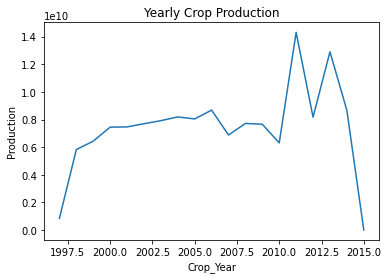

In [11]:
plt.plot(df['Crop_Year'],df['Production'])
plt.xlabel('Crop_Year')
plt.ylabel('Production')
plt.title('Yearly Crop Production')
plt.show()

In [12]:
#Top 50 Crops by Area
df = data.groupby(['Crop'])['Area'].sum().reset_index()
df = df.sort_values('Area',ascending=False)
df = df.head(10)
df

,Crop,Area
95,Rice,7.463186e+08
119,Wheat,4.707132e+08
33,Cotton(lint),1.565579e+08
6,Bajra,1.409679e+08
48,Jowar,1.376593e+08
105,Soyabean,1.354501e+08
59,Maize,1.214845e+08
41,Gram,1.181906e+08
43,Groundnut,1.027078e+08
92,Rapeseed &Mustard,8.657132e+07


<BarContainer object of 10 artists>

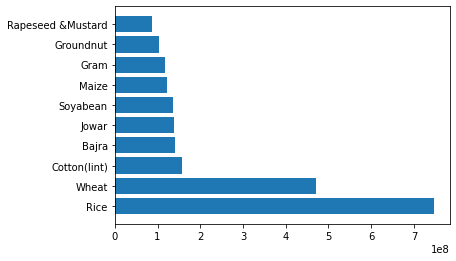

In [13]:
plt.barh(df['Crop'],df['Area'])

In [20]:
#seasonal crops
df = data.groupby(['Crop_Year','Season'])['Crop'].unique().reset_index()
df['Crop'] = df['Crop'].apply(','.join)
df = df.sort_values('Crop')
df

,Crop_Year,Season,Crop
97,2013,Kharif,"Arecanut,Arhar/Tur,Bajra,Brinjal,Cabbage,Cashe..."
91,2012,Kharif,"Arecanut,Arhar/Tur,Bajra,Brinjal,Castor seed,C..."
58,2006,Whole Year,"Arecanut,Banana,Black pepper,Cashewnut,Coconut..."
34,2002,Whole Year,"Arecanut,Banana,Black pepper,Cashewnut,Coconut..."
40,2003,Whole Year,"Arecanut,Banana,Black pepper,Cashewnut,Coconut..."
...,...,...,...
54,2006,Autumn,"Rice,Maize,Ragi,Groundnut,Moong(Green Gram),Se..."
48,2005,Autumn,"Rice,Maize,Ragi,Groundnut,Moong(Green Gram),Se..."
78,2010,Autumn,"Rice,Sugarcane,Maize,Groundnut,Moong(Green Gra..."
64,2007,Whole Year,"Sugarcane,Tobacco,Dry chillies,Dry ginger,Oils..."


In [15]:
# Production Wise Crops
df = data.groupby(['Crop'])['Production'].sum().reset_index()
df = df.sort_values('Production',ascending=False)
df[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08
